In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-574-2024`


In [2]:
Pkg.add(["Plots","FFTW","LinearAlgebra","DSP","Convex","SCS"])

    Updating registry at `~/.julia/registries/General.toml`
    Updating registry at `~/.julia/registries/JSMLComponents.toml`
    Updating registry at `~/.julia/registries/JuliaComputingRegistry.toml`
    Updating registry at `~/.julia/registries/JuliaHubRegistry.toml`
   Resolving package versions...
  No Changes to `~/Documents/programming/BME-574-2024/Project.toml`
  No Changes to `~/Documents/programming/BME-574-2024/Manifest.toml`


In [3]:
using Plots, FFTW, DSP, LinearAlgebra, Random, Distributions, Convex, SCS

In [49]:
n = 4096
t = LinRange(0,1,n)

4096-element LinRange{Float64, Int64}:
 0.0, 0.0002442, 0.0004884, 0.000732601, …, 0.999267, 0.999512, 0.999756, 1.0

In [51]:
x = cos.(2 * 97 * π .* t) + cos.(2 * 777 * π .* t)
fx = fft(x)
psd = abs.(fx) .^ 2 ./n
f = fftfreq(n, 1/t[2])

4096-element Frequencies{Float64}:
   0.0
   0.999755859375
   1.99951171875
   2.999267578125
   3.9990234375
   4.998779296875
   5.99853515625
   6.998291015625
   7.998046875
   8.997802734375
   9.99755859375
  10.997314453125
  11.9970703125
   ⋮
 -11.9970703125
 -10.997314453125
  -9.99755859375
  -8.997802734375
  -7.998046875
  -6.998291015625
  -5.99853515625
  -4.998779296875
  -3.9990234375
  -2.999267578125
  -1.99951171875
  -0.999755859375

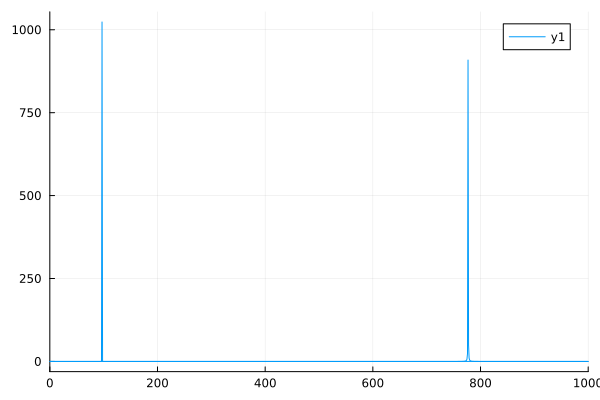

In [52]:
plot(f, psd, xlimit = (0,1000))

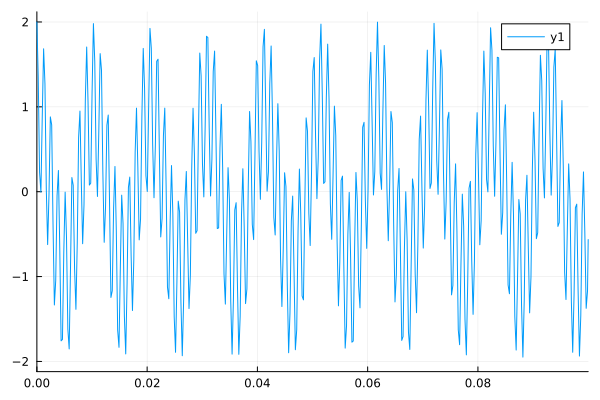

In [25]:
plot(t,x, xlimit=(0,0.1))

In [53]:
p = 128
perm = rand(1:n, p)
y = x[perm]
Psi = dct(LinearAlgebra.I(n))
Theta = Psi[perm,:]

128×4096 Matrix{Float64}:
 0.0   0.0          -7.34192e-19   0.0          …  -4.70274e-18   0.0
 0.0   5.51962e-18   0.0           3.53231e-18      0.0           4.45847e-18
 0.0   0.0           1.13708e-20   0.0             -2.16725e-19   0.0
 0.0  -9.54672e-18   0.0           4.82803e-20      0.0           1.49583e-17
 0.0   0.0           0.0           0.0              0.0           0.0
 0.0  -1.94456e-18   0.0          -2.19914e-19  …   0.0           5.98153e-18
 0.0   0.0          -4.37708e-18   0.0              2.77246e-18   0.0
 0.0   8.15165e-19   0.0          -1.77561e-18      0.0          -4.34818e-18
 0.0  -1.13603e-18   0.0          -3.96877e-18      0.0           2.34329e-20
 0.0   0.0           1.04915e-17   0.0             -4.68186e-18   0.0
 0.0   0.0           0.0           0.0          …   0.0           0.0
 0.0   0.0           0.0           0.0              0.0           0.0
 0.0  -3.03229e-19   0.0          -1.84495e-18      0.0           6.1007e-19
 ⋮               

In [47]:
size(Psi)

(4096, 4096)

In [75]:
# function to fit Lasso regression
function lasso(A,y,λ1,λ2)
    x = Variable(size(A)[2])
    problem = minimize(sumsquares(A*x-y)/length(y) + λ1*norm(x,1) + λ2*norm(x,2))
    solve!(problem, SCS.Optimizer; silent=true)
    return vec(evaluate(x))
end

lasso (generic function with 1 method)

In [81]:
lambdas = exp10.(range(-4, stop = 4, length = 100));

In [82]:
results = [lasso(Theta,y,l,0.0) for l in lambdas]

100-element Vector{Vector{Float64}}:
 [1.9935974151214442, -6.770133281772152e-17, 4.0345193165339373e-19, -8.411882273513142e-17, 2.4449445352377633e-19, -7.542564710037667e-17, -9.61403602370621e-20, -5.941808852839603e-17, -1.3910887689198342e-18, -5.4907067149782606e-17  …  6.319673938260279e-19, -7.360285497856042e-17, 4.105516127167703e-19, -4.4999639037071883e-17, 1.6777910665626952, -6.305267033501977e-17, -2.7050563931538053e-19, -7.70413062781217e-17, 4.412628008421945e-19, -6.197759553393041e-17]
 [1.9922905782229574, 1.7618228739969572e-15, -1.6452550117055457e-18, 1.7680470307311945e-15, 1.106922452954738e-18, 1.777056369948312e-15, -1.1454518323115511e-18, 1.7871658281002602e-15, -1.8575301016822385e-18, 1.8036957975179648e-15  …  2.2173277115884475e-20, 1.7808326785857445e-15, -4.483298489929138e-18, 1.7930774583692482e-15, 1.6764829216439083, 1.8128073771265553e-15, 6.769119145402082e-19, 1.782730812161511e-15, -8.575305380627512e-19, 1.790249130774908e-15]
 [1.99070571

In [83]:
n = map(results) do x begin
        return norm(x,1)
    end
end

100-element Vector{Float64}:
 108.79230790095343
 108.63207786127934
 108.43813523067531
 108.20474885532869
 107.93696833413433
 107.61066405251775
 107.21755746776114
 106.74569734333781
 106.1841979611066
 105.5088402207495
 104.7003474728556
 103.74992135686435
 102.61445083289996
   ⋮
   0.00024365608698653454
   0.00018915051924865115
   0.0008410092166824187
   6.888611313328657e-5
   1.5351260664620395e-10
   1.0581033023606476e-10
   7.293099377829366e-11
   5.0268536176353426e-11
   3.464817810281952e-11
   2.388166652716288e-11
   1.646072413865432e-11
   1.1345753440163516e-11

In [84]:
maximum(n)

108.79230790095343

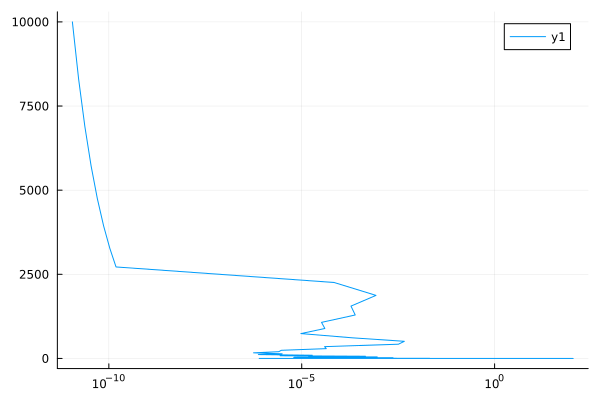

In [85]:
plot(n,lambdas,xaxis=:log)

In [72]:
xrecon = idct(results[3])

4096-element Vector{Float64}:
 -0.1787262912076199
 -0.1166356244274297
  0.04572841604918738
 -0.27221113082328313
 -0.3163595393645832
  0.1175527847479295
 -0.14645226769206912
 -0.17023137640098748
  0.2443007500452913
 -0.03785000823001504
 -0.07692222454010568
 -0.14063629027427316
 -0.022048830356392213
  ⋮
  0.3271905174080815
  0.4310167394266369
  0.12698498938203417
  0.2763990252129051
  0.2455073579264651
  0.14459282220542494
 -0.11802598032384835
  0.41831170791526556
 -0.011154045926426603
 -0.040239353984891424
 -0.20386498084902677
  0.06966164267640391

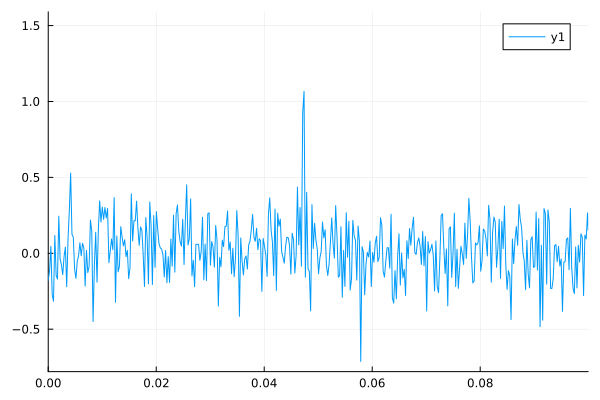

In [73]:
plot(t,xrecon,xlimit=(0,0.1))